# Autoencoders training

In [1]:
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import keras
from keras.callbacks import TensorBoard
from keras.datasets import mnist
import tensorflow as tf

from utils import *
from autoencoders import *

In [2]:
keras.backend.clear_session()
print("GPUs Available: ", tf.config.list_physical_devices('GPU'))
print(tf.test.is_built_with_cuda())

GPUs Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
True


In [3]:
w_length = 200
w_increment = 100

path = 'D:\Documentos\Datasets\Grabaciones 1'

raw_data = loadRawData(path, w_length, w_increment)

AT_FE1.txt
AT_FE2.txt
AT_FE3.txt
AT_FE4.txt
AT_FE_EC1.txt
AT_FE_EC2.txt
AT_FE_FC1.txt
AT_FE_FC2.txt
AT_PS1.txt
AT_PS2.txt
AT_PS3.txt
AT_PS4.txt
AT_PS5.txt
AT_PS_PC1.txt
AT_PS_PC2.txt
AT_PS_SC1.txt
AT_PS_SC2.txt
JT_FE1.txt
JT_FE2.txt
JT_FE_EC1.txt
JT_FE_EC2.txt
JT_FE_FC1.txt
JT_FE_FC2.txt
JT_PS1.txt
JT_PS2.txt
JT_PS_PC1.txt
JT_PS_PC2.txt
JT_PS_SC1.txt
JT_PS_SC2.txt
SV_FE1.txt
SV_FE2.txt
SV_FE3.txt
SV_FE4.txt
SV_FE_EC1.txt
SV_FE_EC2.txt
SV_FE_FC1.txt
SV_FE_FC2.txt
SV_PS1.txt
SV_PS2.txt
SV_PS_PC1.txt
SV_PS_PC2.txt
SV_PS_SC1.txt
SV_PS_SC2.txt
Y_FE1.txt
Y_FE2.txt
Y_FE_EC1.txt
Y_FE_EC2.txt
Y_FE_FC1.txt
Y_FE_FC2.txt
Y_PS1.txt
Y_PS2.txt
Y_PS_PC1.txt
Y_PS_PC2.txt
Y_PS_SC1.txt
Y_PS_SC2.txt


In [4]:
w, c = raw_data[0].shape
ch = c - 1
print('Number of examples (m) = ', len(raw_data))
print('Window lenght (w) = ', w)
print('Number of EMG channels (ch) = ', ch)

Number of examples (m) =  12408
Window lenght (w) =  200
Number of EMG channels (ch) =  4


In [5]:
emg_raw_arr = np.array(raw_data)[:,:,0:4]
print(emg_raw_arr.shape)

(12408, 200, 4)


In [6]:
maf_emg_data = maf(emg_raw_arr)

ascol = maf_emg_data.reshape(-1, ch)
sc = MinMaxScaler()
trans = sc.fit_transform(ascol)

maf_emg_data = trans.reshape(-1, w, ch)
print(maf_emg_data.shape)

(12408, 200, 4)


In [7]:
X_train, X_test = train_test_split(maf_emg_data, test_size=0.1)
print(X_train.shape)
print(X_test.shape)

(11167, 200, 4)
(1241, 200, 4)


In [7]:
X_train_flat = X_train.reshape(X_train.shape[0], w*ch)
X_test_flat = X_test.reshape(X_test.shape[0], w*ch)
print(X_train_flat.shape)
print(X_test_flat.shape)

(11167, 800)
(1241, 800)


In [8]:
autoencoders_names = []
autoencoders_train_mae = []
autoencoders_test_mae = []

# Deep Autoencoder

In [10]:
ann_enc = ann_encoder(64)
ann_dec = ann_decoder(w*ch)
deep_ae = autoencoder(ann_enc, ann_dec, (w*ch,))

In [12]:
deep_ae.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mae'])
deep_ae.summary()

Model: "Autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 800)]             0         
                                                                 
 Deep_encoder (Sequential)   (None, 64)                114944    
                                                                 
 Deep_decoder (Sequential)   (None, 800)               115680    
                                                                 
Total params: 230,624
Trainable params: 230,624
Non-trainable params: 0
_________________________________________________________________


In [13]:
# log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

history = deep_ae.fit(X_train_flat, X_train_flat, epochs=100, batch_size=256, shuffle=True, validation_data=(X_test_flat, X_test_flat))

Epoch 1/100
44/44 [==============================] - 2s 11ms/step - loss: 0.3331 - mae: 0.1876 - val_loss: 0.1295 - val_mae: 0.0294
Epoch 2/100
44/44 [==============================] - 0s 5ms/step - loss: 0.1242 - mae: 0.0245 - val_loss: 0.1206 - val_mae: 0.0202
Epoch 3/100
44/44 [==============================] - 0s 5ms/step - loss: 0.1174 - mae: 0.0187 - val_loss: 0.1172 - val_mae: 0.0182
Epoch 4/100
44/44 [==============================] - 0s 5ms/step - loss: 0.1159 - mae: 0.0177 - val_loss: 0.1168 - val_mae: 0.0181
Epoch 5/100
44/44 [==============================] - 0s 5ms/step - loss: 0.1156 - mae: 0.0175 - val_loss: 0.1165 - val_mae: 0.0177
Epoch 6/100
44/44 [==============================] - 0s 5ms/step - loss: 0.1154 - mae: 0.0174 - val_loss: 0.1164 - val_mae: 0.0172
Epoch 7/100
44/44 [==============================] - 0s 5ms/step - loss: 0.1152 - mae: 0.0173 - val_loss: 0.1161 - val_mae: 0.0174
Epoch 8/100
44/44 [==============================] - 0s 5ms/step - loss: 0.1149 - 

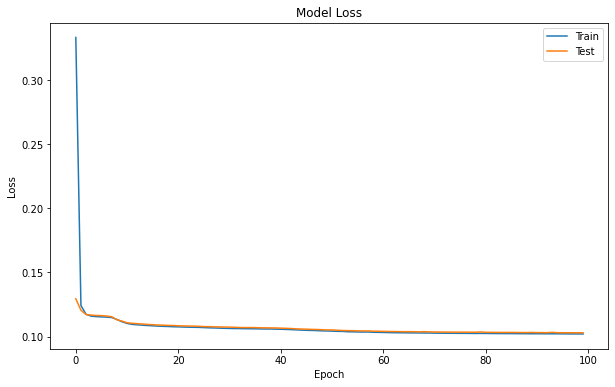

In [14]:
plotLoss(history)

In [15]:
autoencoders_names.append('Deep Autoencoder')
autoencoders_train_mae.append(deep_ae.evaluate(X_train_flat, X_train_flat)[1])
autoencoders_test_mae.append(deep_ae.evaluate(X_test_flat, X_test_flat)[1])

39/39 [==============================] - 0s 2ms/step - loss: 0.1030 - mae: 0.0067


1/1 [==============================] - 0s 70ms/step


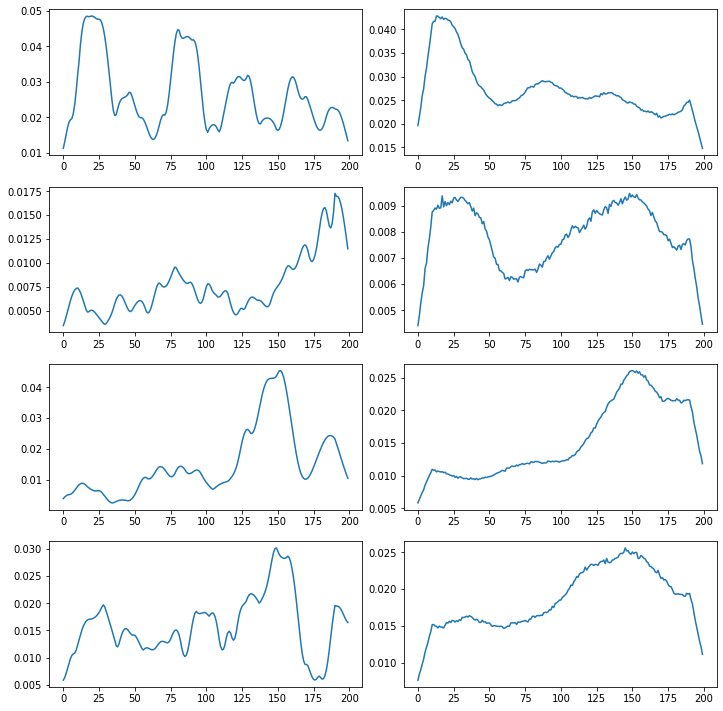

In [16]:
fig, axs = plt.subplots(4, 2, figsize=(10,10))
fig.tight_layout()

sample = 0

real_data = X_test_flat.reshape(X_test_flat.shape[0], w, ch)[sample,:,:]

axs[0,0].plot(real_data[:,0])
axs[1,0].plot(real_data[:,1])
axs[2,0].plot(real_data[:,2])
axs[3,0].plot(real_data[:,3])

deco_data = deep_ae.predict(X_test_flat[sample,:].reshape(1, X_test_flat.shape[1]))
deco_data = deco_data.reshape(1, w, ch)[0,:,:]

axs[0,1].plot(deco_data[:,0])
axs[1,1].plot(deco_data[:,1])
axs[2,1].plot(deco_data[:,2])
axs[3,1].plot(deco_data[:,3])


# Convolutional Autoencoder

In [9]:
latent_dim = (2,2)
cnn_enc = cnn_encoder(latent_dim)
cnn_dec = cnn_decoder(latent_dim)
cnn_ae = autoencoder(cnn_enc, cnn_dec, (w,ch,1))

In [10]:
cnn_ae.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mae'])
cnn_ae.summary()

Model: "Autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 4, 1)]       0         
                                                                 
 Convolutional_encoder (Sequ  (None, 50, 1, 8)         792       
 ential)                                                         
                                                                 
 Convolutional_decoder (Sequ  (None, 200, 4, 1)        2393      
 ential)                                                         
                                                                 
Total params: 3,185
Trainable params: 3,185
Non-trainable params: 0
_________________________________________________________________


In [11]:
# log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

history = cnn_ae.fit(X_train, X_train, epochs=100, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/100
44/44 [==============================] - 4s 30ms/step - loss: 0.1303 - mae: 0.0287 - val_loss: 0.1177 - val_mae: 0.0261
Epoch 2/100
44/44 [==============================] - 0s 9ms/step - loss: 0.1125 - mae: 0.0207 - val_loss: 0.1107 - val_mae: 0.0176
Epoch 3/100
44/44 [==============================] - 0s 9ms/step - loss: 0.1090 - mae: 0.0165 - val_loss: 0.1088 - val_mae: 0.0153
Epoch 4/100
44/44 [==============================] - 0s 9ms/step - loss: 0.1072 - mae: 0.0144 - val_loss: 0.1071 - val_mae: 0.0133
Epoch 5/100
44/44 [==============================] - 0s 9ms/step - loss: 0.1059 - mae: 0.0127 - val_loss: 0.1060 - val_mae: 0.0118
Epoch 6/100
44/44 [==============================] - 0s 9ms/step - loss: 0.1050 - mae: 0.0114 - val_loss: 0.1052 - val_mae: 0.0106
Epoch 7/100
44/44 [==============================] - 0s 9ms/step - loss: 0.1043 - mae: 0.0103 - val_loss: 0.1047 - val_mae: 0.0097
Epoch 8/100
44/44 [==============================] - 0s 9ms/step - loss: 0.1038 - 

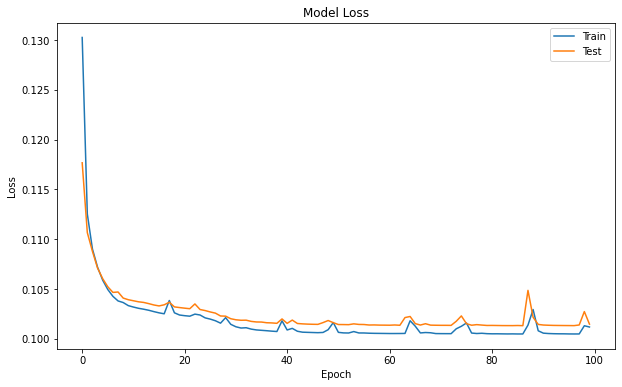

In [12]:
plotLoss(history)

In [13]:
autoencoders_names.append('CNN Autoencoder')
autoencoders_train_mae.append(cnn_ae.evaluate(X_train, X_train)[1])
autoencoders_test_mae.append(cnn_ae.evaluate(X_test, X_test)[1])

39/39 [==============================] - 0s 5ms/step - loss: 0.1015 - mae: 0.0023


1/1 [==============================] - 0s 146ms/step


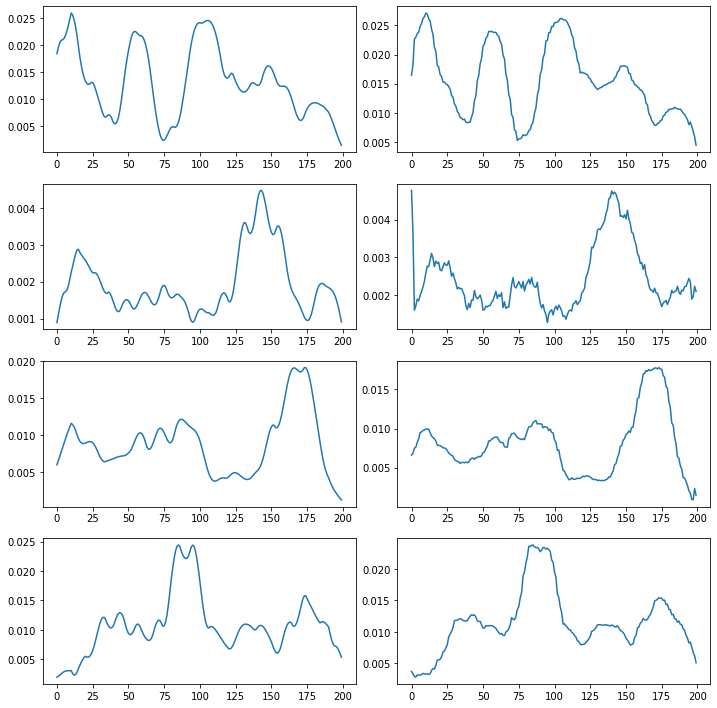

In [14]:
fig, axs = plt.subplots(4, 2, figsize=(10,10))
fig.tight_layout()

sample = 0

real_data = X_test[sample,:,:]

axs[0,0].plot(real_data[:,0])
axs[1,0].plot(real_data[:,1])
axs[2,0].plot(real_data[:,2])
axs[3,0].plot(real_data[:,3])

deco_data = cnn_ae.predict(X_test[sample,:,:].reshape(1, w, ch, 1))
deco_data = deco_data.reshape(1, w, ch)[0,:,:]

axs[0,1].plot(deco_data[:,0])
axs[1,1].plot(deco_data[:,1])
axs[2,1].plot(deco_data[:,2])
axs[3,1].plot(deco_data[:,3])

# Sequence to Sequence Autoencoder

In [16]:
lstm_enc = lstm_encoder(64)
lstm_dec = lstm_decoder(w, ch)
lstm_ae = autoencoder(lstm_enc, lstm_dec, (w,ch))

In [17]:
lstm_ae.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mae'])
lstm_ae.summary()

Model: "Autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200, 4)]          0         
                                                                 
 sts_encoder (Sequential)    (None, 64)                14848     
                                                                 
 sts_decoder (Sequential)    (None, 200, 4)            1104      
                                                                 
Total params: 15,952
Trainable params: 15,952
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = lstm_ae.fit(X_train, X_train, epochs=100, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/100
44/44 [==============================] - 5s 53ms/step - loss: 0.1195 - mae: 0.0209 - val_loss: 0.1108 - val_mae: 0.0162
Epoch 2/100
44/44 [==============================] - 2s 40ms/step - loss: 0.1090 - mae: 0.0156 - val_loss: 0.1084 - val_mae: 0.0145
Epoch 3/100
44/44 [==============================] - 2s 40ms/step - loss: 0.1073 - mae: 0.0137 - val_loss: 0.1072 - val_mae: 0.0129
Epoch 4/100
44/44 [==============================] - 2s 39ms/step - loss: 0.1099 - mae: 0.0167 - val_loss: 0.1086 - val_mae: 0.0149
Epoch 5/100
44/44 [==============================] - 2s 42ms/step - loss: 0.1071 - mae: 0.0137 - val_loss: 0.1073 - val_mae: 0.0131
Epoch 6/100
44/44 [==============================] - 2s 40ms/step - loss: 0.1062 - mae: 0.0126 - val_loss: 0.1065 - val_mae: 0.0125
Epoch 7/100
44/44 [==============================] - 2s 38ms/step - loss: 0.1057 - mae: 0.0121 - val_loss: 0.1061 - val_mae: 0.0118
Epoch 8/100
44/44 [==============================] - 2s 41ms/step - loss: 0.

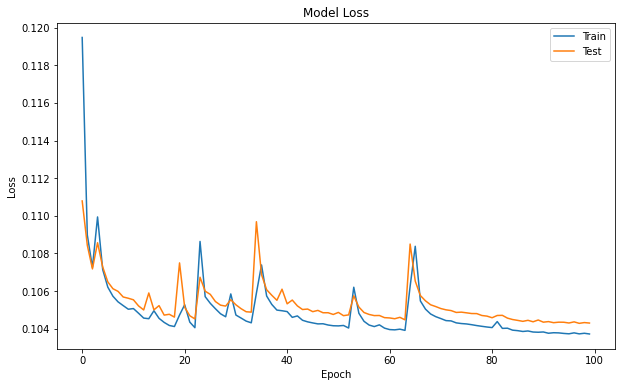

In [24]:
plotLoss(history)

In [25]:
autoencoders_names.append('LSTM Autoencoder')
autoencoders_train_mae.append(lstm_ae.evaluate(X_train, X_train)[1])
autoencoders_test_mae.append(lstm_ae.evaluate(X_test, X_test)[1])

39/39 [==============================] - 1s 17ms/step - loss: 0.1043 - mae: 0.0098


1/1 [==============================] - 0s 489ms/step


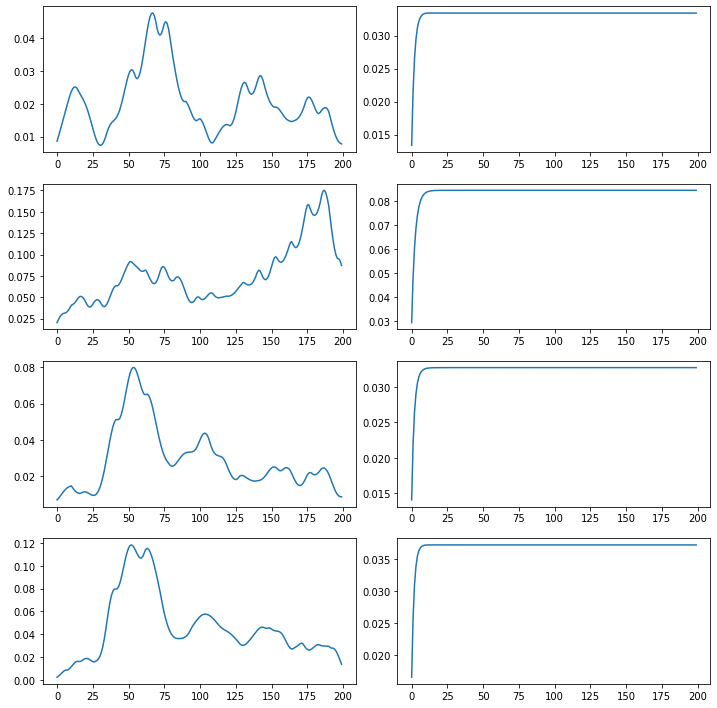

In [26]:
fig, axs = plt.subplots(4, 2, figsize=(10,10))
fig.tight_layout()

sample = 0

real_data = X_test[sample,:,:]

axs[0,0].plot(real_data[:,0])
axs[1,0].plot(real_data[:,1])
axs[2,0].plot(real_data[:,2])
axs[3,0].plot(real_data[:,3])

deco_data = lstm_ae.predict(X_test[sample,:,:].reshape(1, w, ch))
deco_data = deco_data.reshape(1, w, ch)[0,:,:]

axs[0,1].plot(deco_data[:,0])
axs[1,1].plot(deco_data[:,1])
axs[2,1].plot(deco_data[:,2])
axs[3,1].plot(deco_data[:,3])

# Variational Autoencoder

In [15]:
vae_ae, vae_enc, vae_dec = vae_autoencoder((w*ch,), w*ch, 128, 64)

In [16]:
vae_ae.compile(optimizer='adam', metrics=['mae'])
vae_ae.summary()

Model: "vae_autoencoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 800)]        0           []                               
                                                                                                  
 vae_encoder (Functional)       [(None, 64),         119040      ['input_2[0][0]']                
                                 (None, 64),                                                      
                                 (None, 64)]                                                      
                                                                                                  
 vae_decoder (Functional)       (None, 800)          111520      ['vae_encoder[0][2]']            
                                                                                    

In [29]:
history = vae_ae.fit(X_train_flat, X_train_flat, epochs=100, batch_size=128, shuffle=True, validation_data=(X_test_flat, X_test_flat))

Epoch 1/100
88/88 [==============================] - 1s 8ms/step - loss: 227.0997 - mae: 0.1398 - val_loss: 92.3768 - val_mae: 0.0189
Epoch 2/100
88/88 [==============================] - 0s 6ms/step - loss: 90.4707 - mae: 0.0182 - val_loss: 90.3579 - val_mae: 0.0174
Epoch 3/100
88/88 [==============================] - 0s 6ms/step - loss: 89.8885 - mae: 0.0180 - val_loss: 90.2057 - val_mae: 0.0183
Epoch 4/100
88/88 [==============================] - 0s 5ms/step - loss: 89.4334 - mae: 0.0177 - val_loss: 89.5220 - val_mae: 0.0166
Epoch 5/100
88/88 [==============================] - 0s 6ms/step - loss: 87.8446 - mae: 0.0155 - val_loss: 87.2100 - val_mae: 0.0143
Epoch 6/100
88/88 [==============================] - 0s 6ms/step - loss: 86.3684 - mae: 0.0134 - val_loss: 86.5424 - val_mae: 0.0127
Epoch 7/100
88/88 [==============================] - 0s 6ms/step - loss: 85.9536 - mae: 0.0131 - val_loss: 86.3723 - val_mae: 0.0128
Epoch 8/100
88/88 [==============================] - 0s 5ms/step - l

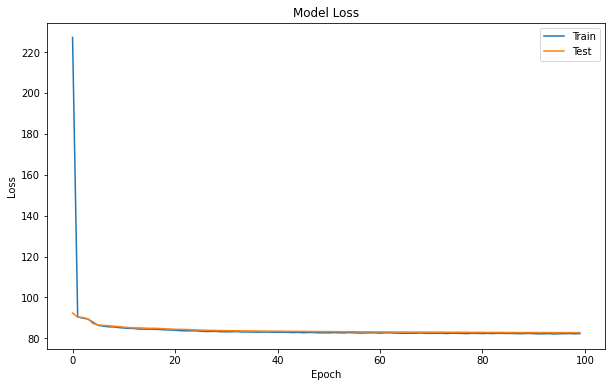

In [30]:
plotLoss(history)

In [31]:
autoencoders_names.append('VAE Autoencoder')
autoencoders_train_mae.append(vae_ae.evaluate(X_train_flat, X_train_flat)[1])
autoencoders_test_mae.append(vae_ae.evaluate(X_test_flat, X_test_flat)[1])

39/39 [==============================] - 0s 3ms/step - loss: 82.8404 - mae: 0.0071


1/1 [==============================] - 0s 105ms/step


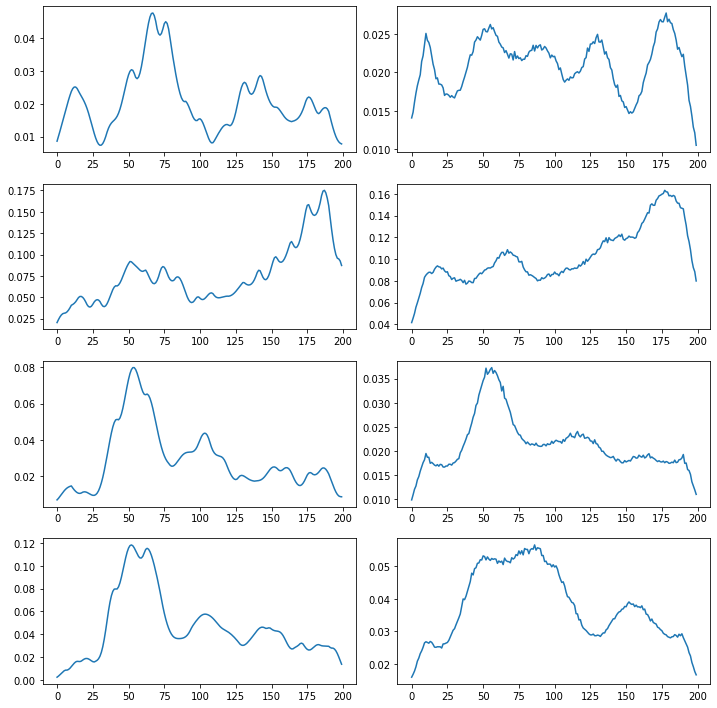

In [32]:
fig, axs = plt.subplots(4, 2, figsize=(10,10))
fig.tight_layout()

sample = 0

real_data = X_test_flat.reshape(X_test_flat.shape[0], w, ch)[sample,:,:]

axs[0,0].plot(real_data[:,0])
axs[1,0].plot(real_data[:,1])
axs[2,0].plot(real_data[:,2])
axs[3,0].plot(real_data[:,3])

deco_data = vae_ae.predict(X_test_flat[sample,:].reshape(1, X_test_flat.shape[1]))
deco_data = deco_data.reshape(1, w, ch)[0,:,:]

axs[0,1].plot(deco_data[:,0])
axs[1,1].plot(deco_data[:,1])
axs[2,1].plot(deco_data[:,2])
axs[3,1].plot(deco_data[:,3])

# Autoencoders Comparison

In [33]:
autoencoders_comparison = pd.DataFrame(zip(autoencoders_names, autoencoders_train_mae, autoencoders_test_mae), columns=['Model', 'Train MAE', 'Test MAE'])

autoencoders_comparison = autoencoders_comparison.sort_values('Test MAE', ascending=True)
autoencoders_comparison

,Model,Train MAE,Test MAE
1,CNN Autoencoder,0.001732,0.001730
0,Deep Autoencoder,0.005581,0.005754
3,VAE Autoencoder,0.007013,0.007129
2,LSTM Autoencoder,0.009769,0.009784


# Selected Model Training

In [17]:
cnn_encoder_final = cnn_encoder((2,2))
cnn_decoder_final = cnn_decoder((2,2))
cnn_autoencoder_final = autoencoder(cnn_encoder_final, cnn_decoder_final, (w,ch,1))
cnn_autoencoder_final.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mae'])
history = cnn_autoencoder_final.fit(emg_data_arr, emg_data_arr, epochs=100, batch_size=256, shuffle=True)

Epoch 1/100
97/97 [==============================] - 2s 11ms/step - loss: 0.1137 - mae: 0.0212
Epoch 2/100
97/97 [==============================] - 1s 6ms/step - loss: 0.1065 - mae: 0.0132
Epoch 3/100
97/97 [==============================] - 1s 6ms/step - loss: 0.1040 - mae: 0.0098
Epoch 4/100
97/97 [==============================] - 1s 6ms/step - loss: 0.1033 - mae: 0.0087
Epoch 5/100
97/97 [==============================] - 1s 6ms/step - loss: 0.1027 - mae: 0.0077
Epoch 6/100
97/97 [==============================] - 1s 6ms/step - loss: 0.1018 - mae: 0.0055
Epoch 7/100
97/97 [==============================] - 1s 6ms/step - loss: 0.1015 - mae: 0.0047
Epoch 8/100
97/97 [==============================] - 1s 6ms/step - loss: 0.1018 - mae: 0.0052
Epoch 9/100
97/97 [==============================] - 1s 6ms/step - loss: 0.1012 - mae: 0.0040
Epoch 10/100
97/97 [==============================] - 1s 6ms/step - loss: 0.1011 - mae: 0.0037
Epoch 11/100
97/97 [==============================] - 1s 6

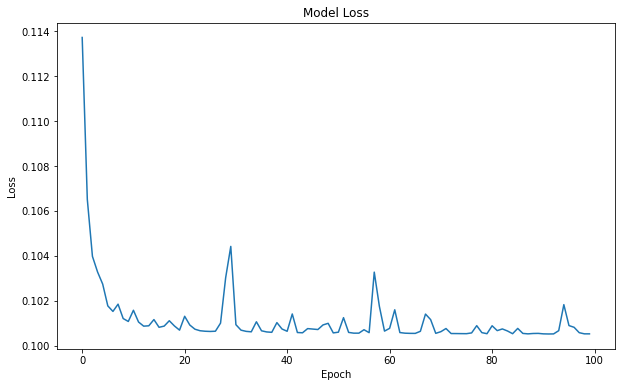

In [18]:
plt.figure(figsize=(10,6))
plt.title('Model Loss')
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [19]:
cnn_encoder_final.save('encoder_model.h5')